In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing 
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import pairwise_distances, log_loss
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import sklearn_tda as sktda
# Can be downloaded at https://github.com/MathieuCarriere/sklearn-tda
import statmapper as stm
# Can be downloaded at https://github.com/MathieuCarriere/statmapper
from metricmapper import *

In [3]:
np.random.seed(0)

In [9]:
X, y = make_blobs(n_samples=500, n_features=256*256*3, centers = 10, random_state=42, cluster_std=1.0)
X_train, y_train = X[:300], y[:300]
X_valid, y_valid = X[300:400], y[300:400]
X_train_valid, y_train_valid = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]

<IPython.core.display.Javascript object>


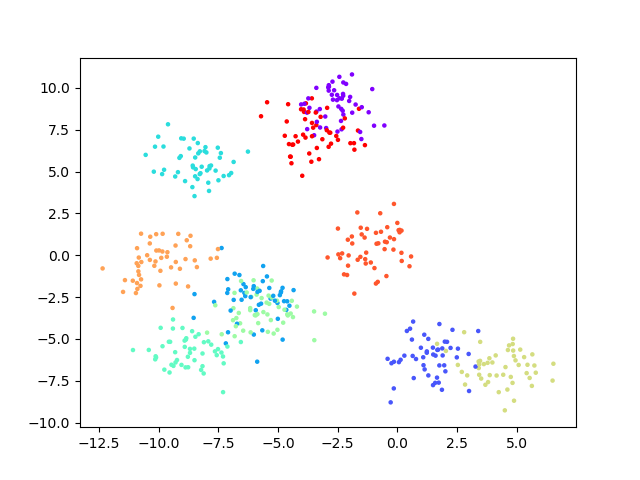

In [10]:
%matplotlib notebook
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=5, cmap="rainbow")
plt.show()

In [11]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)

In [12]:
mapper = sktda.MapperComplex(
    filters=clf_probs,
    filter_bnds=np.array([[np.nan, np.nan]]),
    resolutions=10*np.ones(10), gains=0.3*np.ones(10), colors=clf_probs,
    clustering=AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=10)
                            ).fit(X_test)

<IPython.core.display.Javascript object>


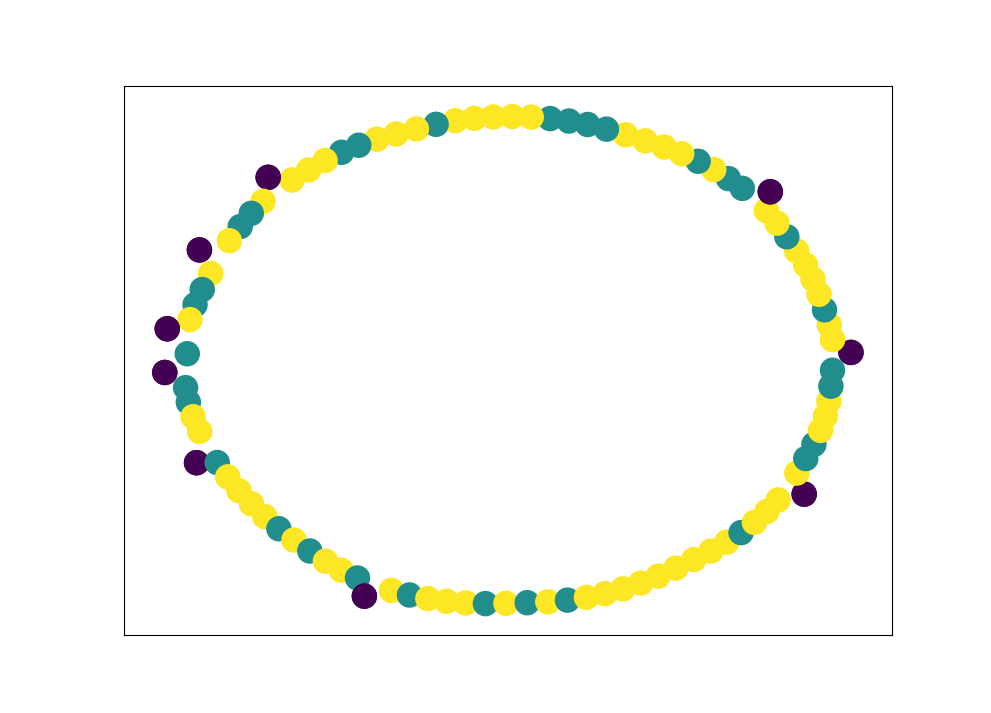

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [13]:
%matplotlib notebook
G = stm.mapper2networkx(mapper)
plt.figure()
nx.draw_networkx(G, with_labels=False, pos=nx.kamada_kawai_layout(G), 
                 node_color=[np.var(mapper.node_info_[name]["colors"]) for name in G.nodes()])

<IPython.core.display.Javascript object>


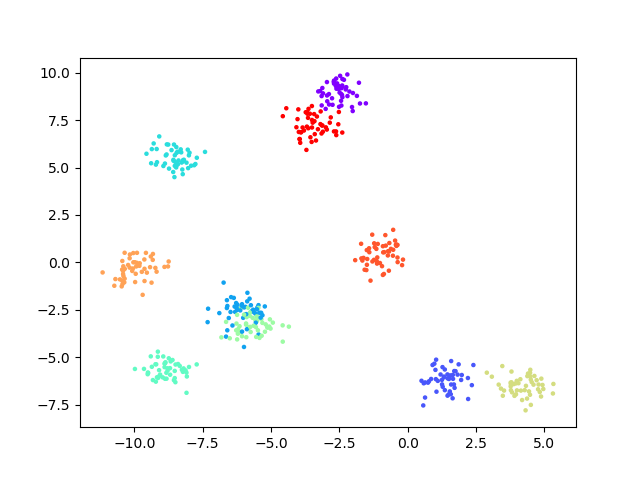

<IPython.core.display.Javascript object>


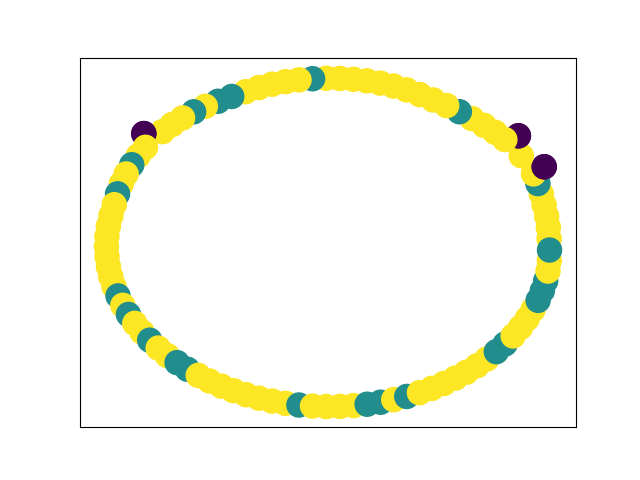

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


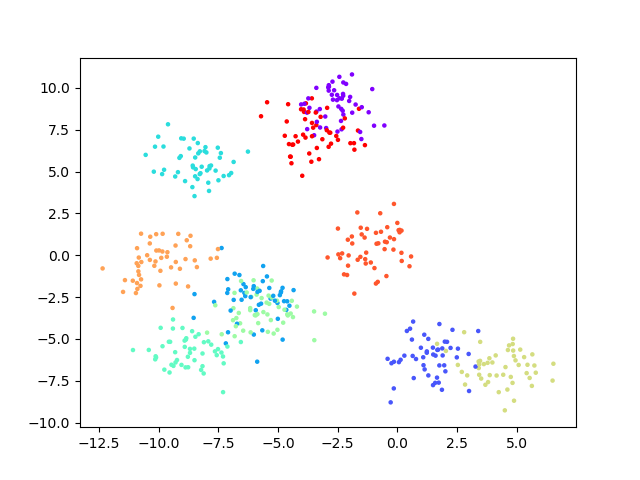

<IPython.core.display.Javascript object>


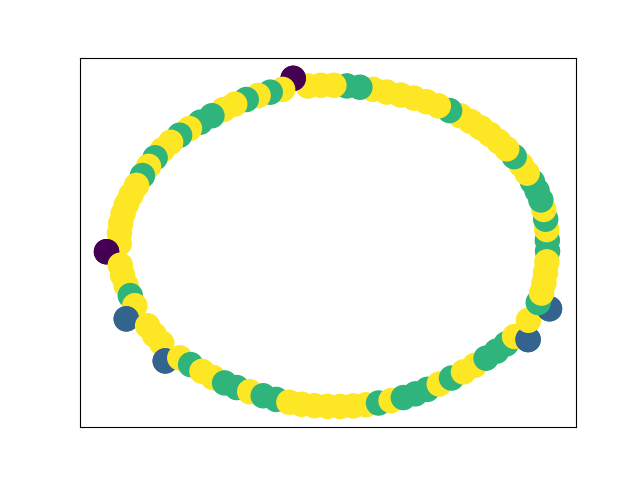

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


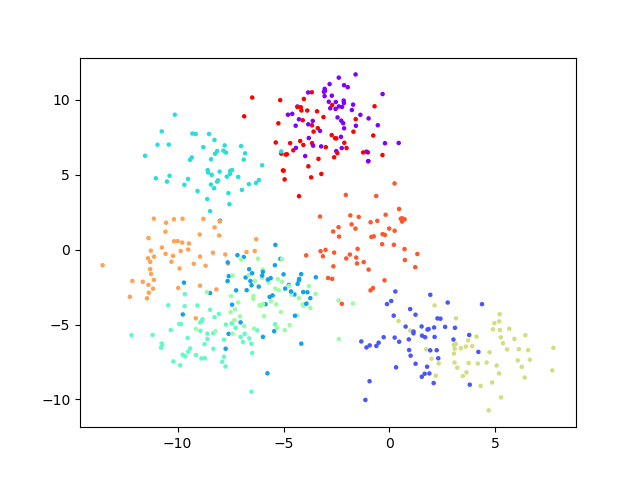

<IPython.core.display.Javascript object>


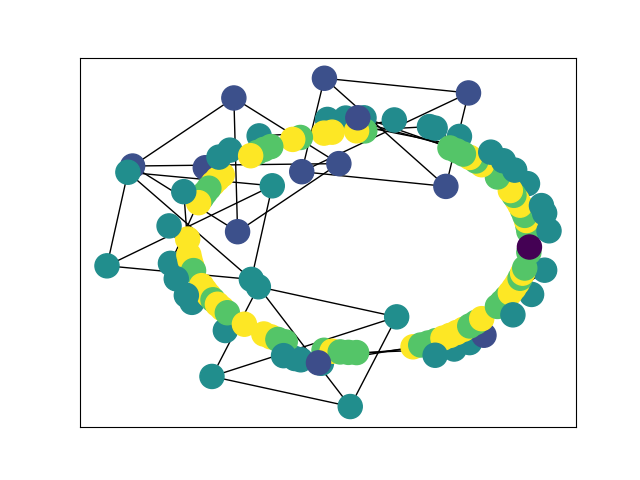

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


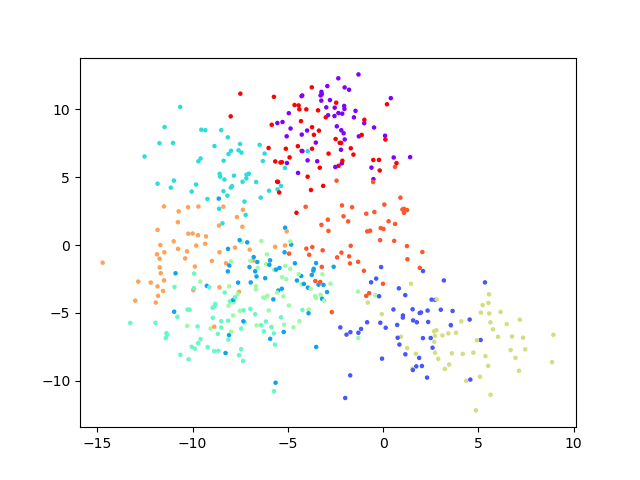

<IPython.core.display.Javascript object>


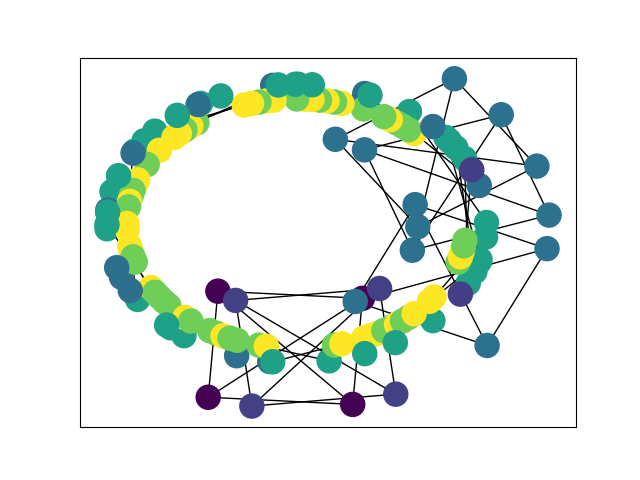

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


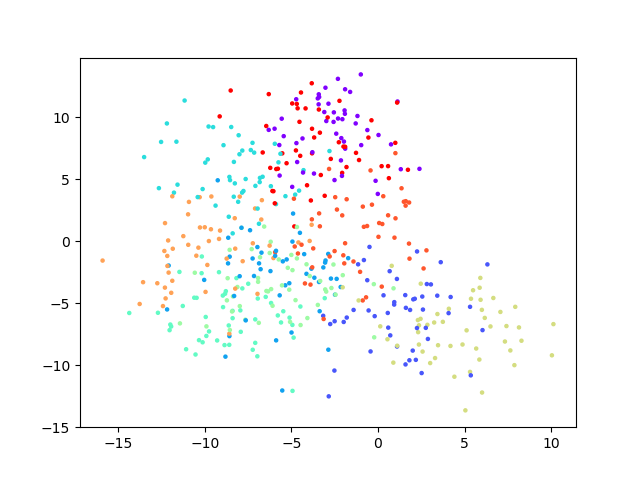

<IPython.core.display.Javascript object>


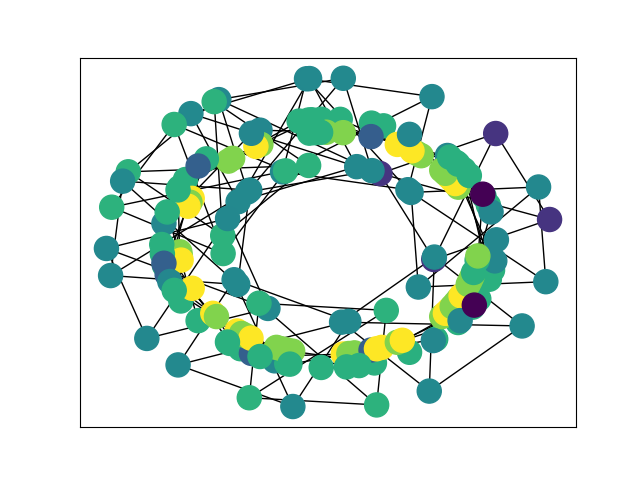

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


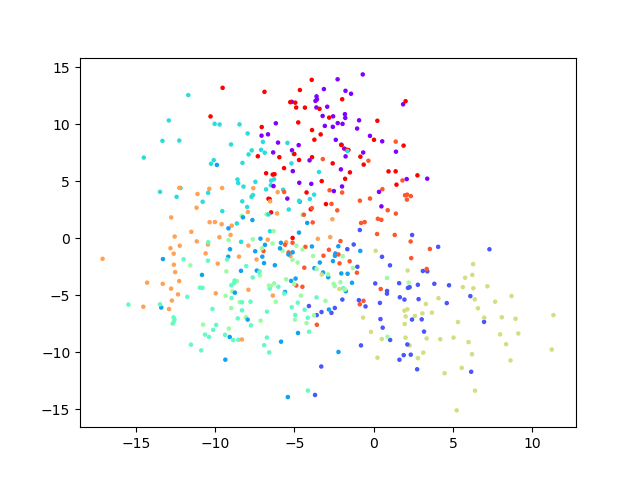

<IPython.core.display.Javascript object>


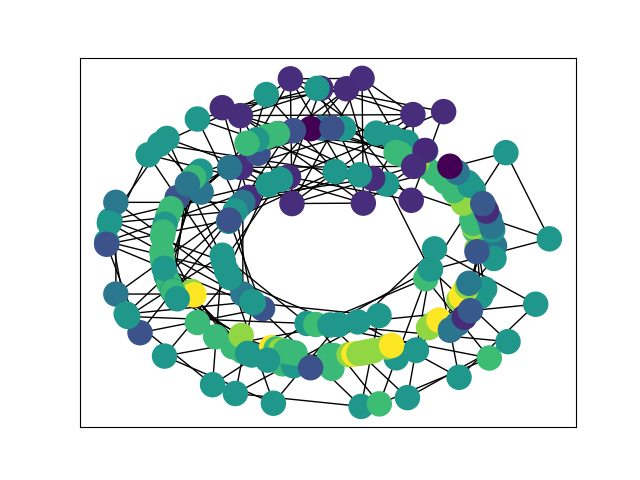

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


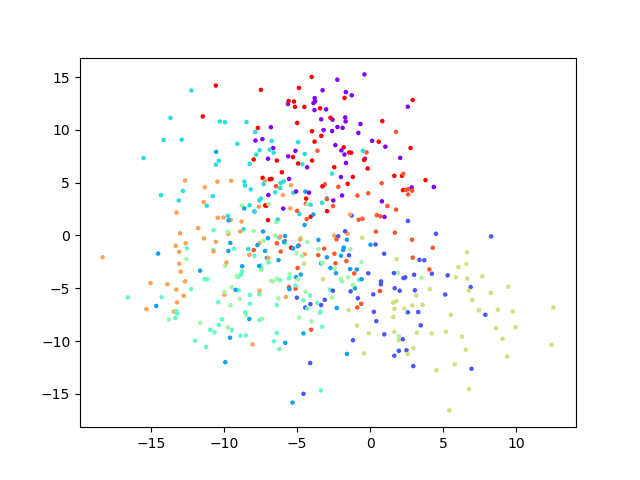

<IPython.core.display.Javascript object>


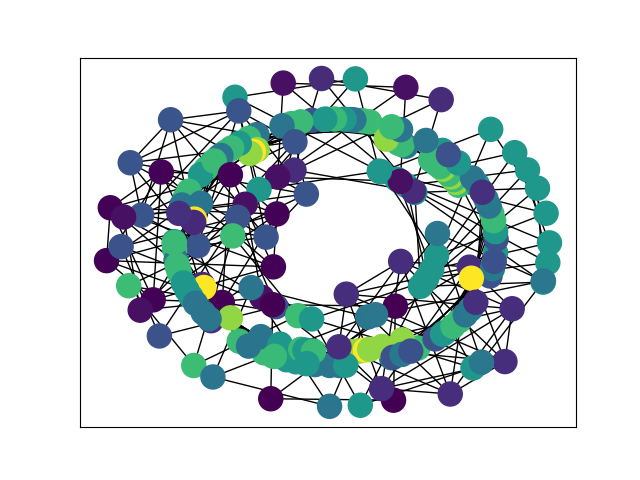

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


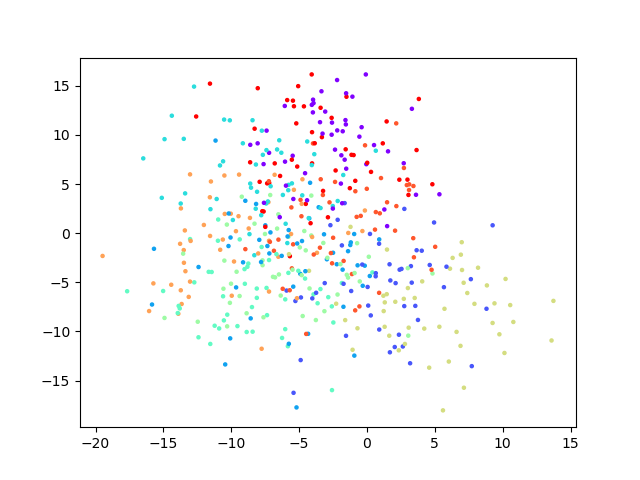

<IPython.core.display.Javascript object>


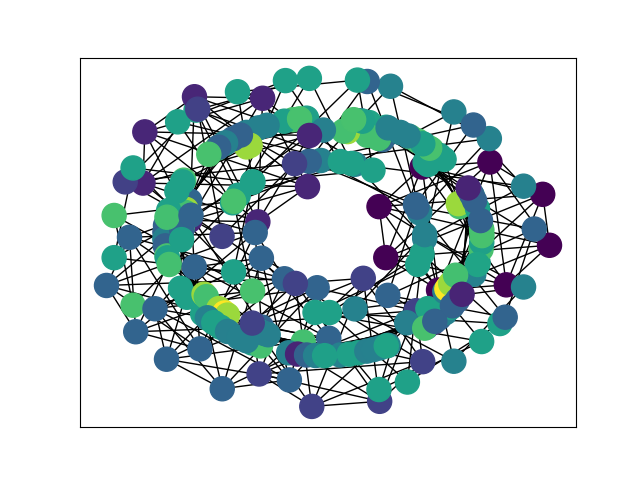

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


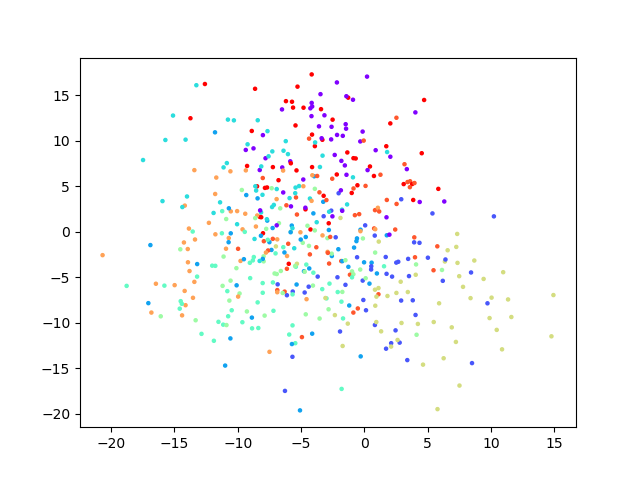

<IPython.core.display.Javascript object>


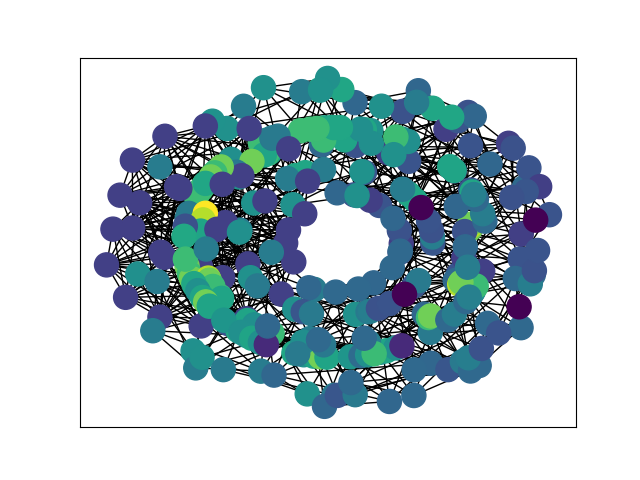

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [26]:
for i in range(9):
    
    #Set random seed
    np.random.seed(1)
    
    #Create Data
    X, y = make_blobs(n_samples=500, n_features=256*256*3, centers = 10, random_state=42, cluster_std=(i+1)/2)
    X_train, y_train = X[:400], y[:400]
    X_test, y_test = X[400:], y[400:]

    #Visualize Data
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, s=5, cmap="rainbow")
    plt.show()

    #Train Classifier
    clf = RandomForestClassifier(n_estimators=25)
    clf.fit(X_train, y_train)
    clf_probs = clf.predict_proba(X_test)

    #Compute Mapper for trained classifier filter
    mapper = sktda.MapperComplex(
        filters=clf_probs,
        filter_bnds=np.array([[np.nan, np.nan]]),
        resolutions=10*np.ones(10), gains=0.3*np.ones(10), colors=clf_probs,
        clustering=AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=10)
                                ).fit(X_test)
    #Visualize 1-skeleton of mapper
    G = stm.mapper2networkx(mapper)
    plt.figure()
    nx.draw_networkx(G, with_labels=False, pos=nx.kamada_kawai_layout(G), 
                     node_color=[np.var(mapper.node_info_[name]["colors"]) for name in G.nodes()])
    plt.show()